In [14]:
import os

In [15]:
training_data = os.listdir('train/')
print(len(training_data) )
   

25000


In [16]:
labels  = []

for file in training_data:
    if "cat" in file:
         labels.append(0)
    else:
        labels.append(1)
    

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as img

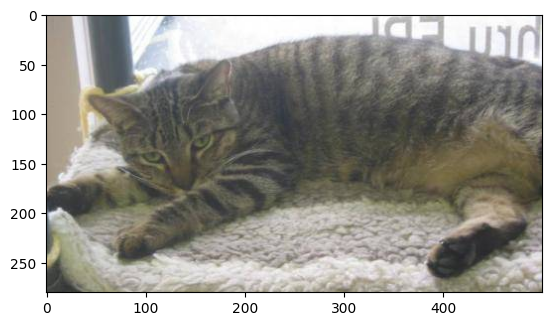

In [18]:
cat_image = img.imread("train/cat.10017.jpg")
plt.imshow(cat_image)